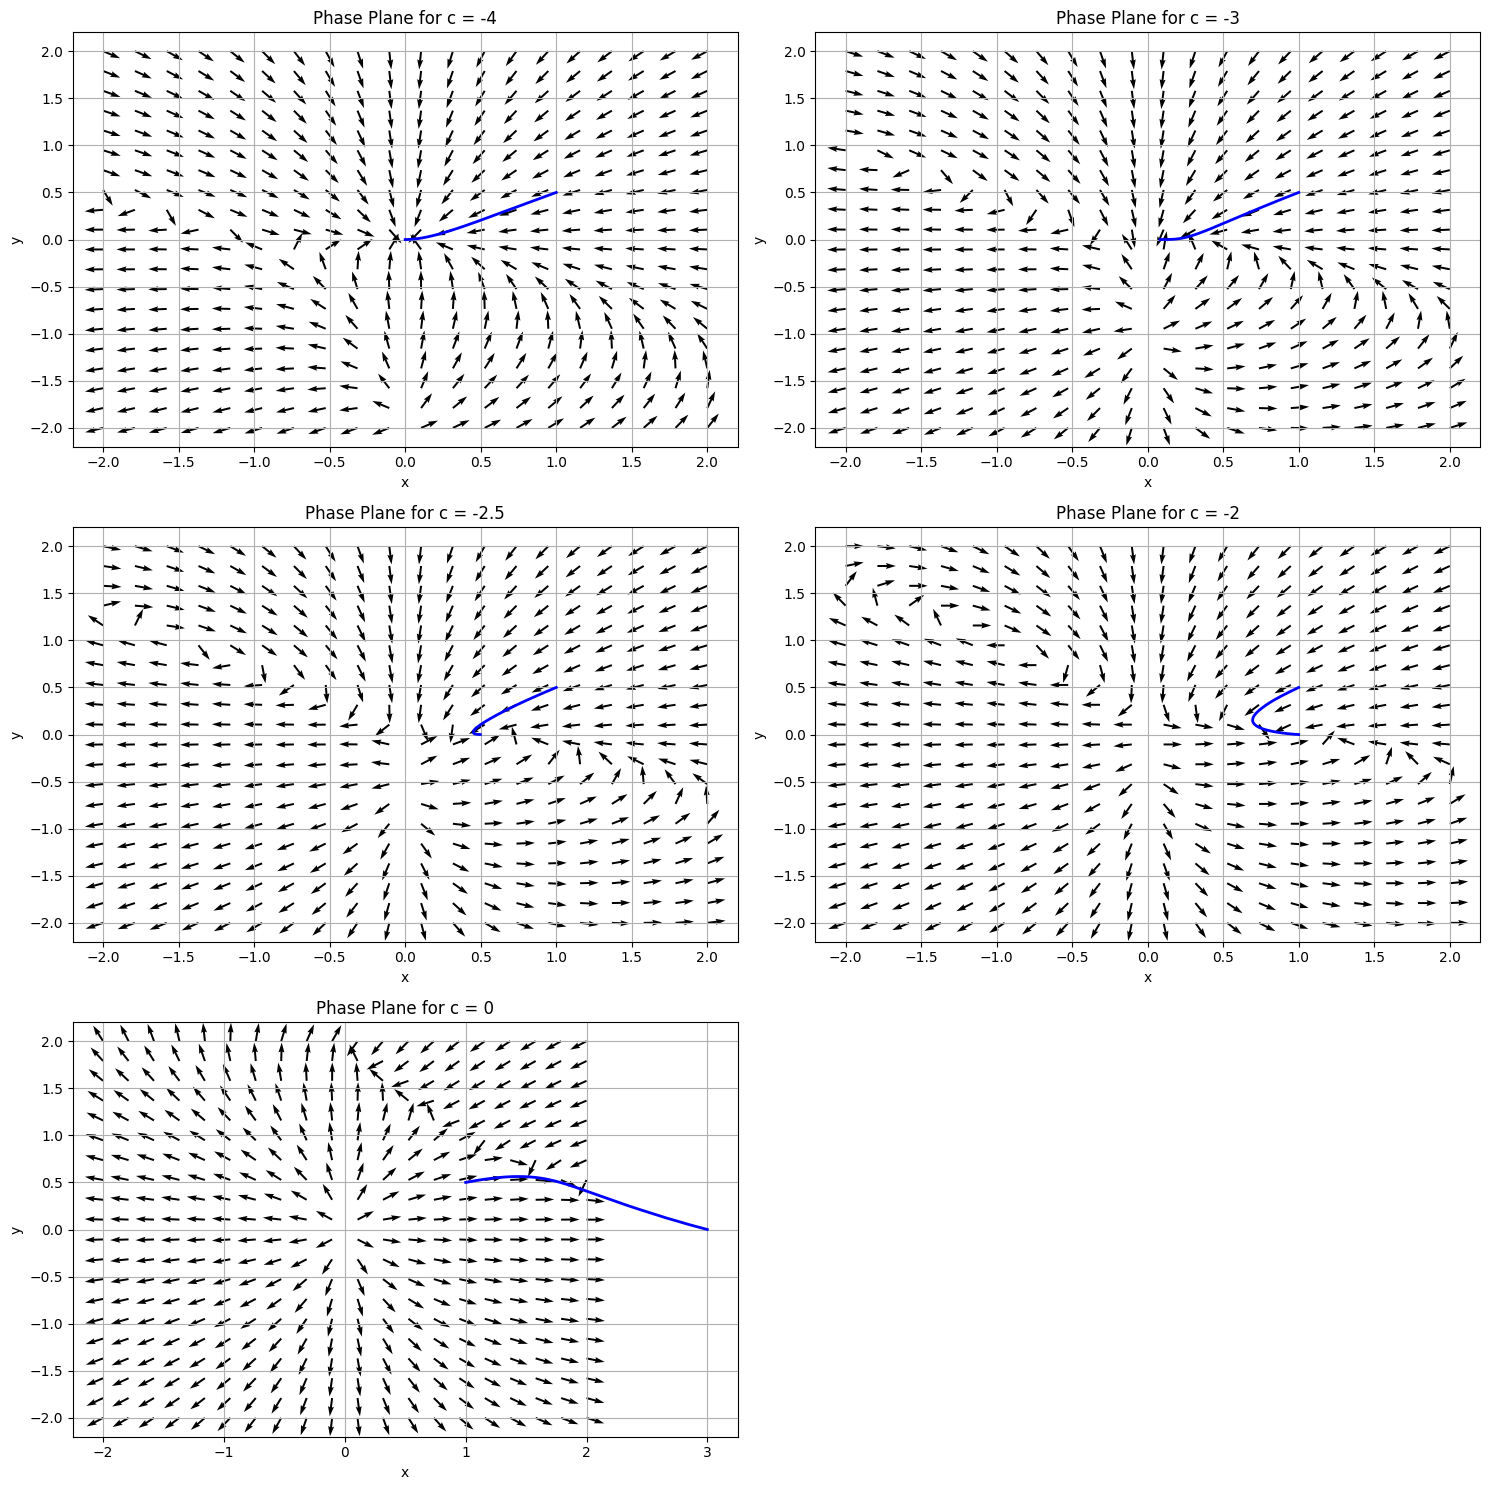

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the system of equations
def system(t, Y, c):
    x, y = Y
    dxdt = x * (3 + c - x - 2*y)
    dydt = y * (2 + c - x - y)
    return [dxdt, dydt]

# Function to plot the vector field and trajectory
def plot_phase_plane(c, ax):
    # Create a meshgrid for the vector field
    x = np.linspace(-2, 2, 20)
    y = np.linspace(-2, 2, 20)
    X, Y = np.meshgrid(x, y)
    
    # Calculate the vector field
    U = X * (3 + c - X - 2*Y)
    V = Y * (2 + c - X - Y)
    
    # Normalize the vectors
    N = np.sqrt(U**2 + V**2)
    U2, V2 = U/N, V/N
    
    # Plot the vector field
    ax.quiver(X, Y, U2, V2, angles='xy')
    
    # Solve the system of ODEs
    t_span = [0, 10]
    y0 = [1, 0.5]
    sol = solve_ivp(system, t_span, y0, args=(c,), dense_output=True)
    
    # Plot the trajectory
    t = np.linspace(0, 10, 400)
    z = sol.sol(t)
    ax.plot(z[0], z[1], 'b-', linewidth=2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Phase Plane for c = {c}')
    ax.grid()

# Values of c to plot
c_values = [-4, -3, -2.5, -2, 0]

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

# Generate plots for each value of c
for i, c in enumerate(c_values):
    plot_phase_plane(c, axes[i])

# Remove the last empty subplot
fig.delaxes(axes[-1])

# Show the plots
plt.tight_layout()
plt.show()

/var/folders/1p/l9_y199s3_3dgzx_l_8mb8fc0000gn/T/ipykernel_850/1883252857.py:25: RuntimeWarning: invalid value encountered in divide
  U2, V2 = U/N, V/N


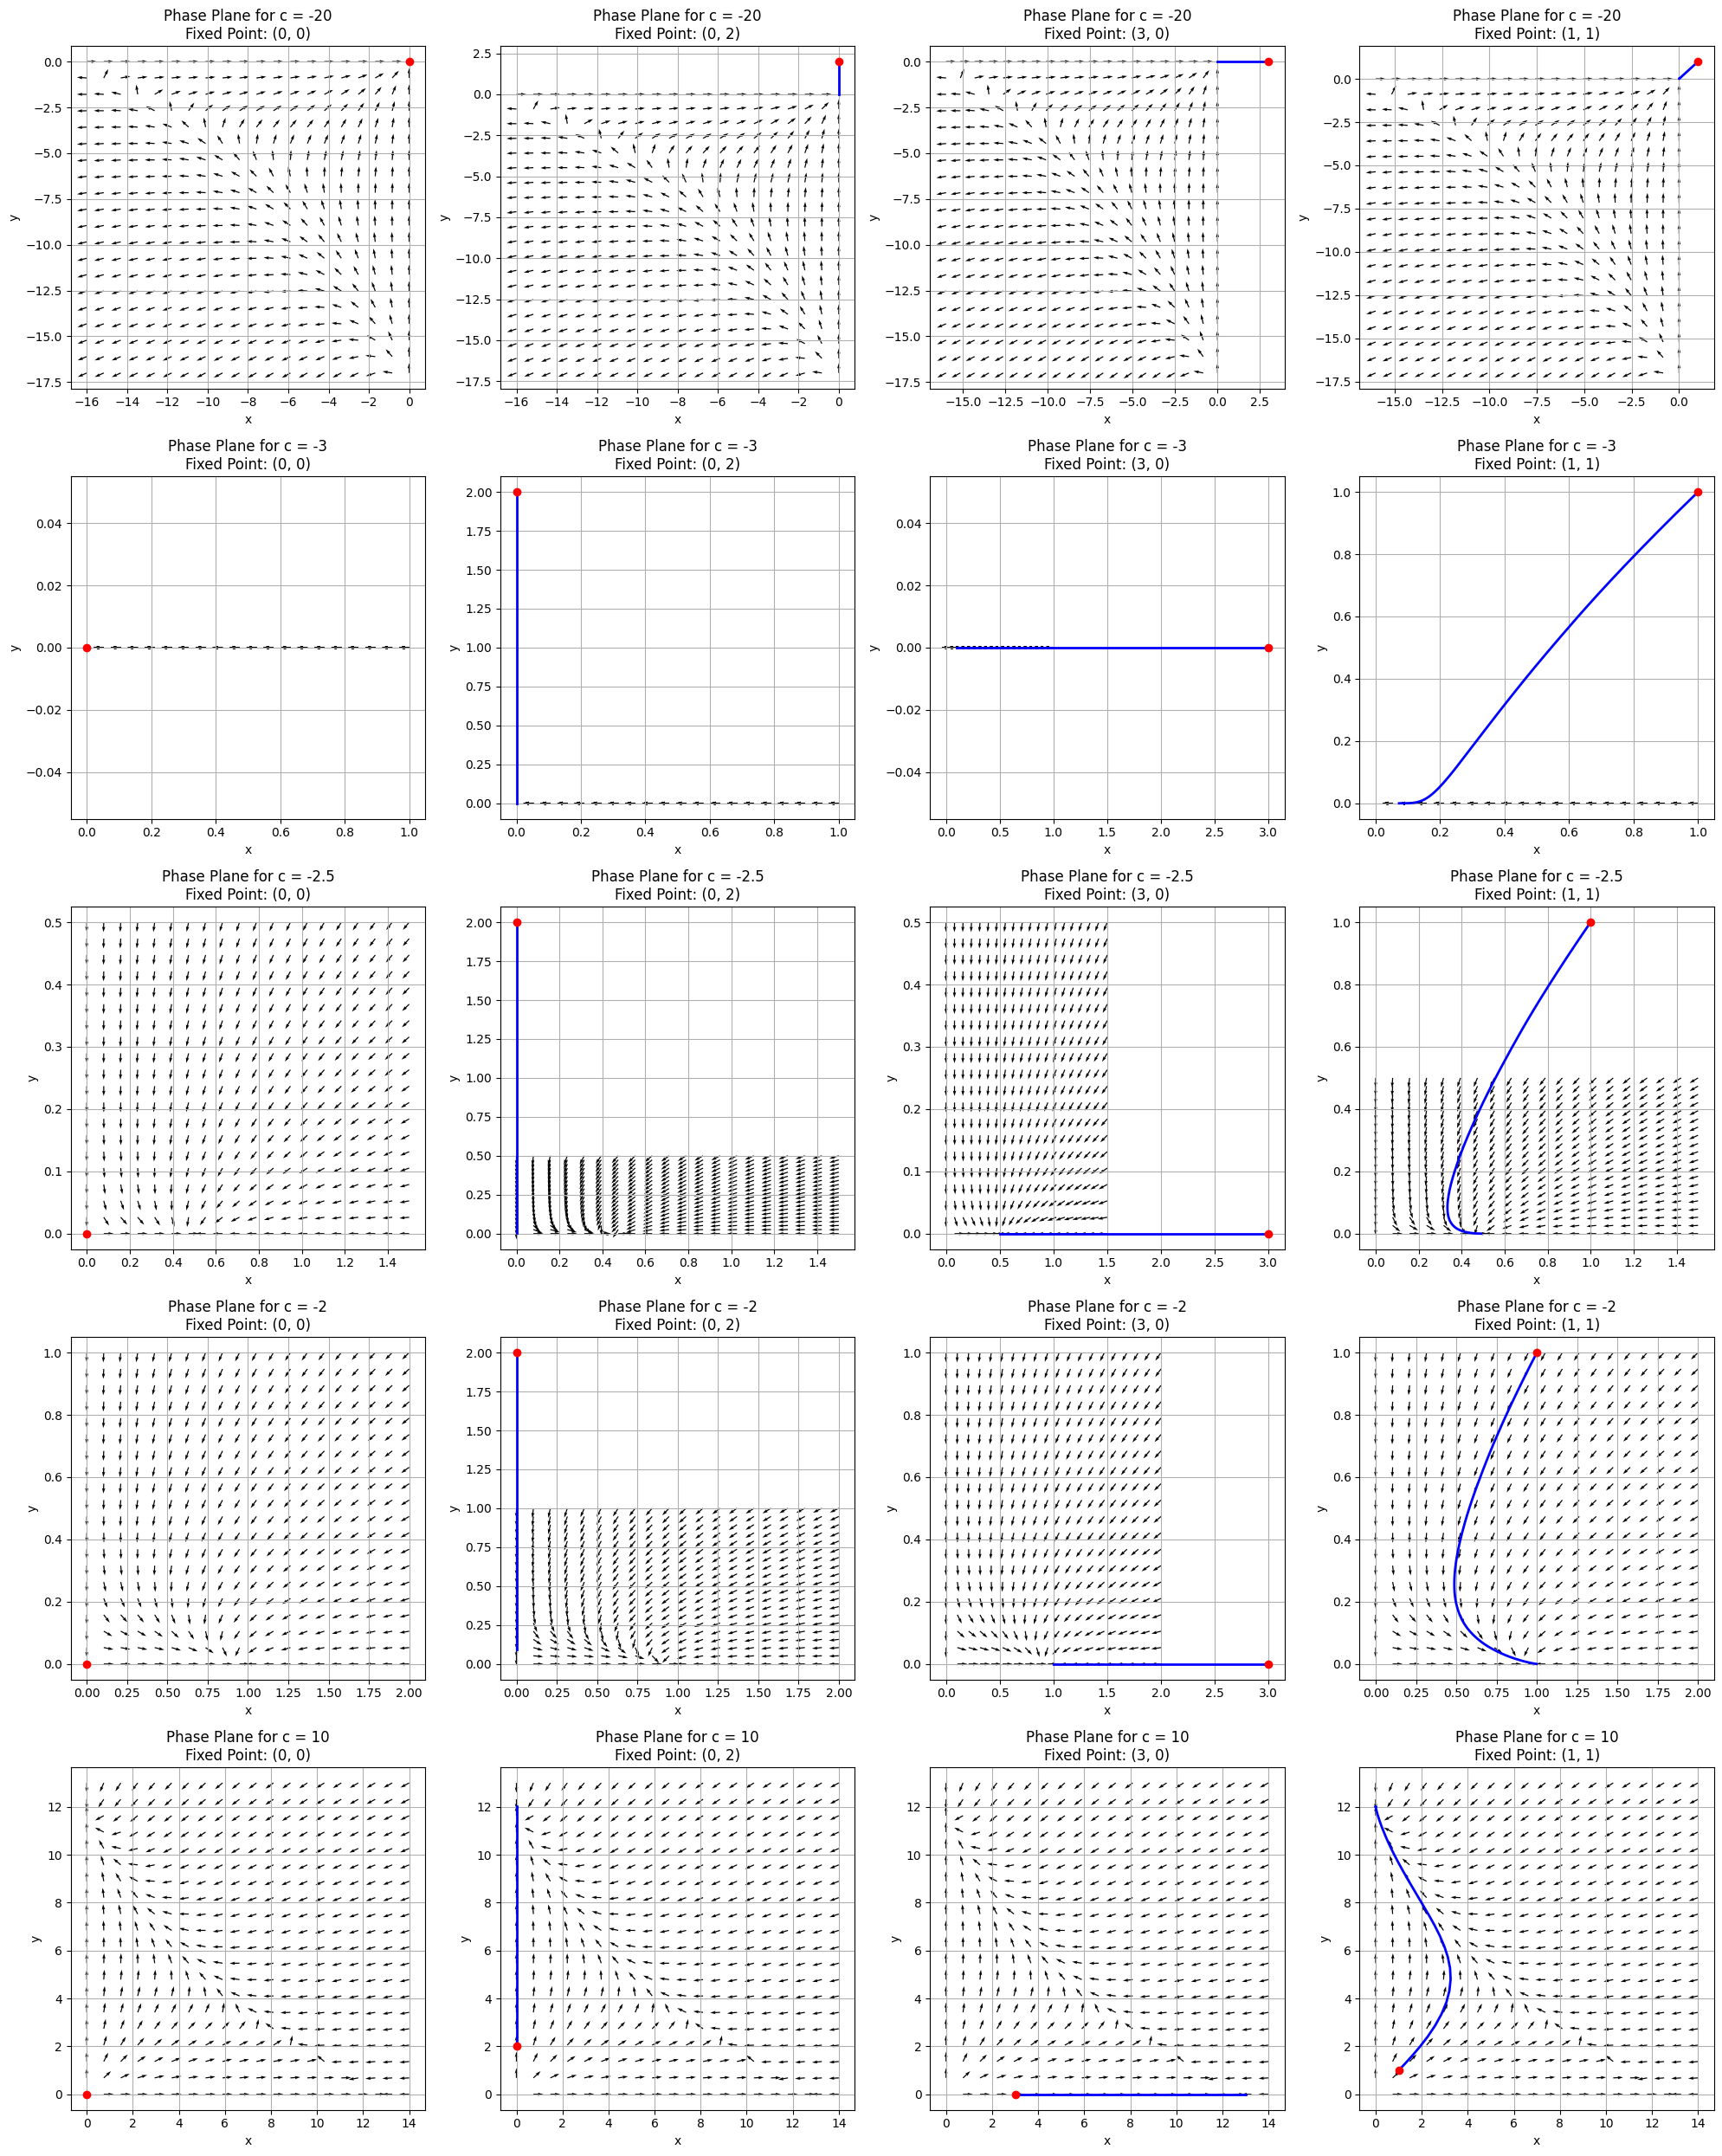

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the system of equations
def system(t, Y, c):
    x, y = Y
    dxdt = x * (3 + c - x - 2*y)
    dydt = y * (2 + c - x - y)
    return [dxdt, dydt]

# Function to plot the vector field and trajectory
def plot_phase_plane(c, fixed_point, ax):
    # Create a meshgrid for the vector field
    x = np.linspace(0, 3 + c + 1, 20)
    y = np.linspace(0, 2 + c + 1, 20)
    X, Y = np.meshgrid(x, y)
    
    # Calculate the vector field
    U = X * (3 + c - X - 2*Y)
    V = Y * (2 + c - X - Y)
    
    # Normalize the vectors
    N = np.sqrt(U**2 + V**2)
    U2, V2 = U/N, V/N
    
    # Plot the vector field
    ax.quiver(X, Y, U2, V2, angles='xy')
    
    # Solve the system of ODEs for each fixed point
    t_span = [0, 10]
    y0 = fixed_point
    sol = solve_ivp(system, t_span, y0, args=(c,), dense_output=True)
    
    # Plot the trajectory
    t = np.linspace(0, 10, 400)
    z = sol.sol(t)
    ax.plot(z[0], z[1], 'b-', linewidth=2)
    ax.plot(fixed_point[0], fixed_point[1], 'ro')  # Fixed point
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Phase Plane for c = {c}\nFixed Point: {fixed_point}')
    ax.grid()

# Values of c to plot
c_values = [-20, -3, -2.5, -2, 10]
fixed_points = [
    (0, 0),
    (0, 2),
    (3, 0),
    (1, 1)
]

# Create subplots
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.flatten()

# Generate plots for each value of c and each fixed point
plot_num = 0
for c in c_values:
    for point in fixed_points:
        plot_phase_plane(c, point, axes[plot_num])
        plot_num += 1

# Show the plots
plt.tight_layout()
plt.show()